<a href="https://colab.research.google.com/github/Luseat/prediksi-serangan-jantung/blob/main/penyakitJantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# **# Import data**

In [2]:

url = "https://raw.githubusercontent.com/Luseat/prediksi-serangan-jantung/refs/heads/main/heartDisease.csv"
df = pd.read_csv(url)
df


,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


#**cleaning** **data**

In [3]:
df.shape

(303, 15)

In [4]:
df.diagnosis.value_counts()

,count
diagnosis,
Jantung,165
Normal,138


In [5]:
df.isnull() .sum()

,0
Unnamed: 0,0
usia,0
jenis kelamin,0
nyeri dada,0
trestbps,0
cholestoral,0
fasting blood sugar,0
restecg,0
denyut jantung,0
exang,0


In [6]:
df.duplicated() .sum()

0

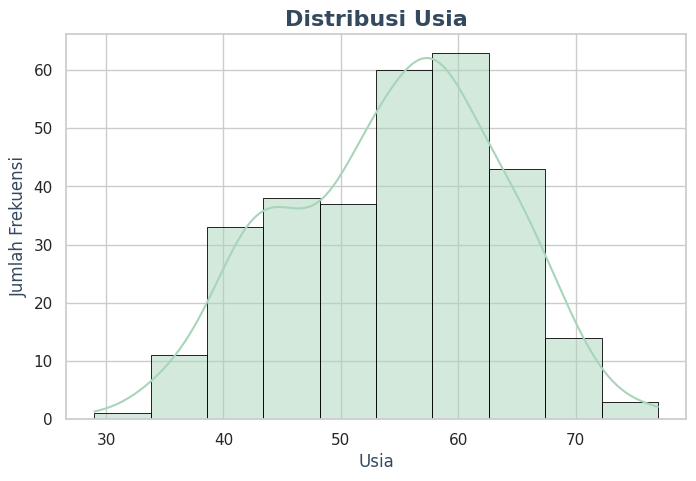

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='usia', bins=10, kde=True, color='#A8D5BA', edgecolor='black', linewidth=0.6)
plt.title('Distribusi Usia', fontweight='bold', fontsize=16, color='#34495E')
plt.xlabel('Usia', fontsize=12, color='#34495E')
plt.ylabel('Jumlah Frekuensi', fontsize=12, color='#34495E')
plt.show()

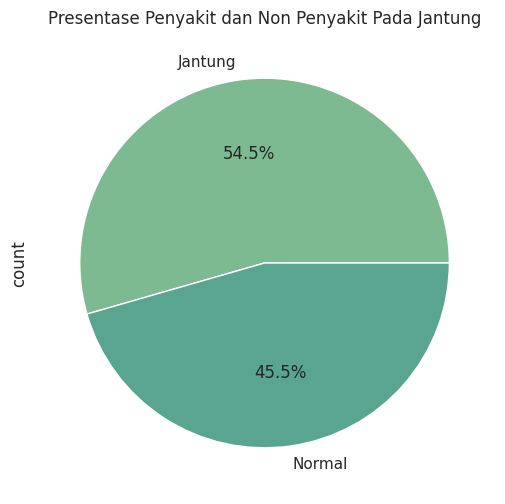

In [17]:
sns.set_palette("crest")
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(10,6))
plt.title('Presentase Penyakit dan Non Penyakit Pada Jantung')
plt.show()